In [24]:
import skimage as sk
import cv2
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate
from skimage.transform import EuclideanTransform, matrix_transform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage import io
import numpy as np

In [3]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

## Image rotation
One of the most useful and simple geometric transformation is rotation, where an image is rotated around a point.

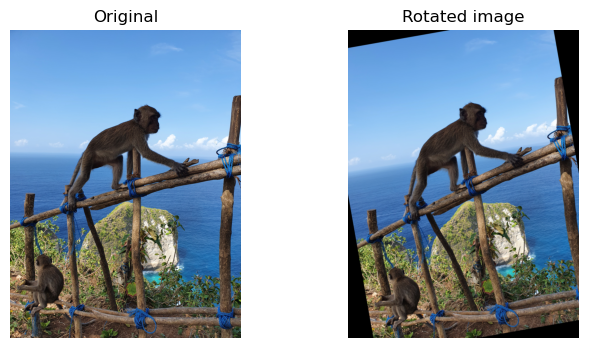

In [4]:
im_org = io.imread("NusaPenida.png")

# angle in degrees - counter clockwise
rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

The image is rotated around the center of the image. This can be changed by manually specifying the point that the image should be rotated around (here (0, 0)):

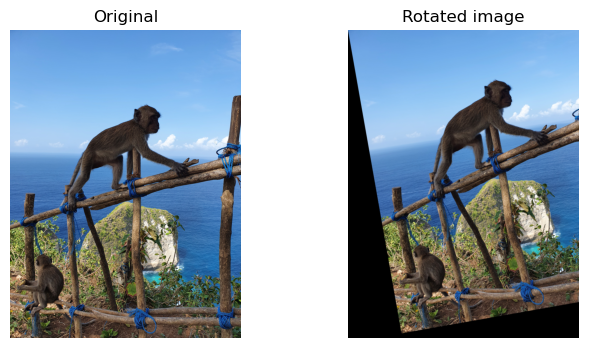

In [5]:
rot_center = [0,0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)

show_comparison(im_org, rotated_img, "Rotated image")

 There are areas of the rotated image that is filled with a background value. It can be controlled how this background filling shall behave.

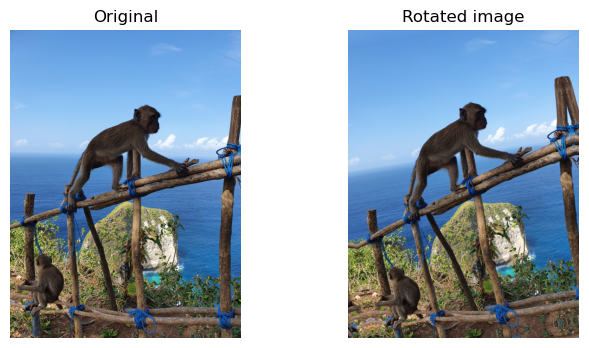

In [6]:
#mode="wrap" is also an option
rotated_img = rotate(im_org, rotation_angle, mode="reflect")

show_comparison(im_org, rotated_img, "Rotated image")

The rotated output image has the same size as the input image and therefore some parts of the rotated image are cropped away. It is possible to automatically adjust the output size, so the rotated image fits into the resized image.

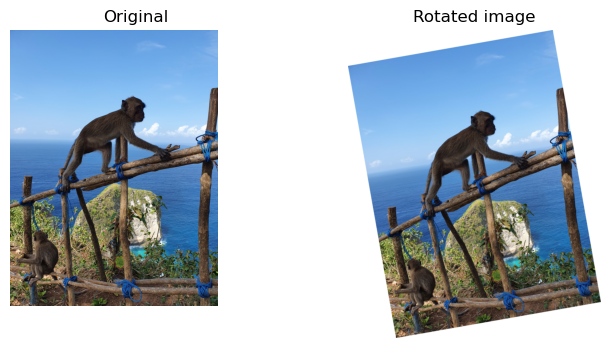

In [7]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval = 1)

show_comparison(im_org, rotated_img, "Rotated image")

automatic resizing:

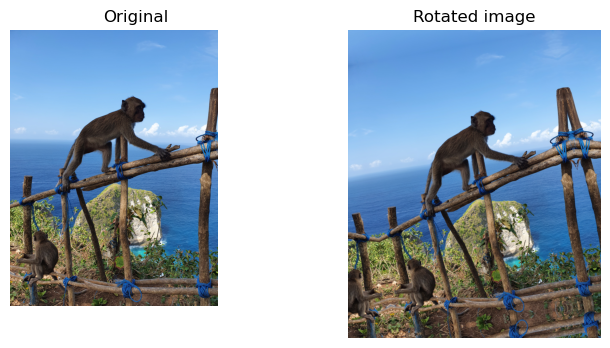

In [8]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="reflect")



show_comparison(im_org, rotated_img, "Rotated image")

## Euclidean image transformation
An alternative way of doing geometric image transformations is to first construct the transformation and then apply it to the image. We will start by the Euclidean image transformation that consists of a rotation and a translation. It is also called a rigid body transformation.

In [9]:
#angle is defined radians
rotation_angle = 10.0 * math.pi / 180

trans = [10,20]
tform = EuclideanTransform(rotation = rotation_angle, translation=trans)

#transformation is 3x3 matirix
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


Transform can be applied to an image using the warp function:

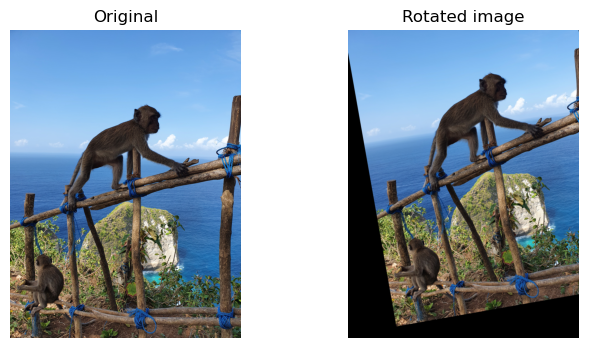

In [10]:
#The warp function actually does an inverse transformation of the image, since it uses the transform to find the pixels values in the input image that should be placed in the output image.

tranformed_img = warp(im_org, tform)

show_comparison(im_org, tranformed_img, "Rotated image")

## Inverse transformation
It is possible to get the inverse of a computed transform by using tform.inverse. An image can then be transformed using the invers transform by:

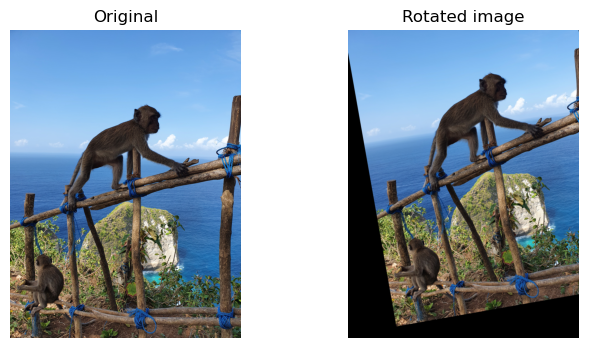

In [11]:
transformed_img = warp(im_org, tform.inverse)

show_comparison(im_org, tranformed_img, "Rotated image")

Construct a Euclidean transformation with only rotation. Test the transformation and the invers transformation and notice the effect.

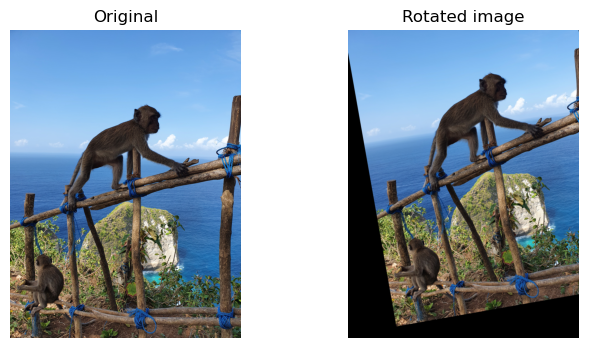

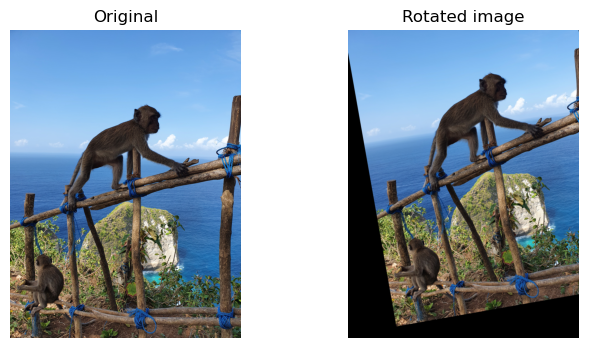

In [12]:
rotation_angle = 10.0 * math.pi / 180
tform = EuclideanTransform(rotation = rotation_angle)

transformed_img = warp(im_org, tform.inverse)

show_comparison(im_org, tranformed_img, "Rotated image")

transformed_img = warp(im_org, tform)

show_comparison(im_org, tranformed_img, "Rotated image")

## Similarity transform of image
The SimilarityTransform computes a transformation consisting of a translation, rotation and a scaling.

In [13]:
rotation_angle = 15.0 * math.pi / 180
trans = [40,30]
scaling = 0.6


similarity_trans = SimilarityTransform(rotation=rotation_angle, translation = trans, scale = scaling)

## The swirl image transformation
The swirl image transform is a non-linear transform that can create interesting visual results on images.

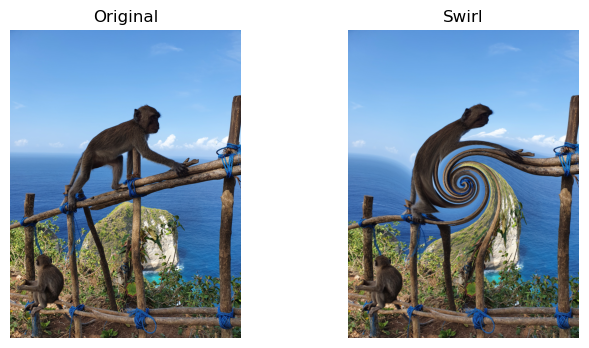

In [14]:
str = 10
rad = 300
swirl_img = swirl(im_org, strength = str, radius = rad)

show_comparison(im_org, swirl_img, "Swirl")

Change the center of the swirl:

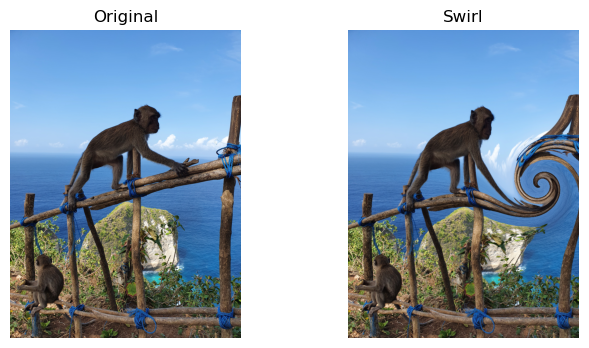

In [15]:
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)

show_comparison(im_org, swirl_img, "Swirl")

## Landmark based registration
The goal of landmark based registration is to align two images using a set of landmarks placed in both images. The landmarks need to have correspondence meaning that the landmarks should be placed on the same anatomical spot in the two images.

There are two photos of hands: Hand1.jpg and Hand2.jpg and the goal is to transform Hand1 so it fits on top of Hand2. In this exercise we call Hand1 one for the source (src) and Hand2 for the destination (dst).

In [16]:
src_img = io.imread("Hand1.jpg")
dst_img = io.imread("Hand2.jpg")


Visualize their overlap by:

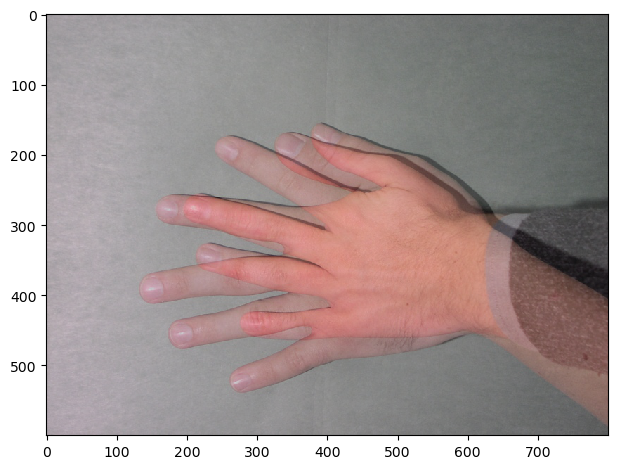

In [17]:
blend = 0.5 * sk.img_as_float(src_img) + 0.5 * sk.img_as_float(dst_img)
io.imshow(blend)
io.show()

## Manual landmark annotation
We will manually placed landmarks on the two images to align the them.

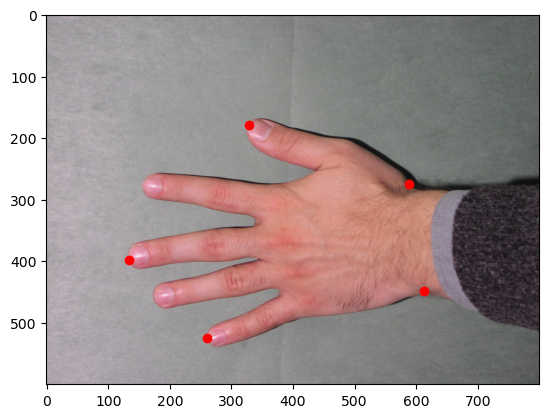

In [18]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

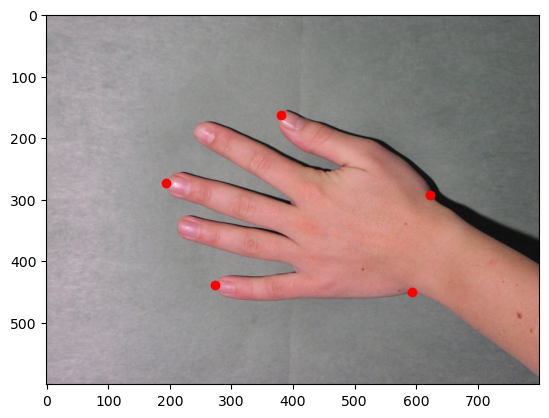

In [19]:
dst = np.array([[622, 293], [380, 163], [194, 272], [274, 438], [593, 450]])

plt.imshow(dst_img)
plt.plot(dst[:, 0], dst[:, 1], '.r', markersize=12)
plt.show()

Plot the landmarks to verify they are correct:

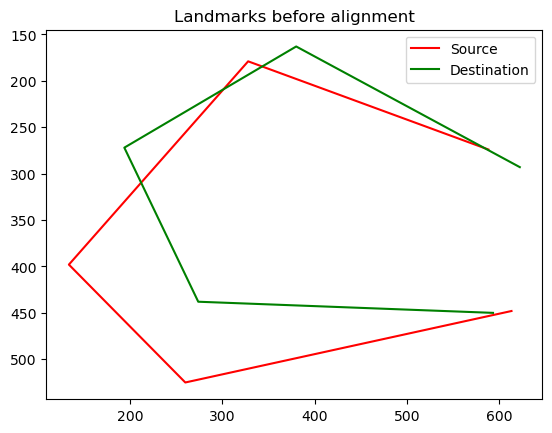

In [20]:
fig, ax = plt.subplots()
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

To calculate how well two sets of landmarks are aligned, we can compute the objective function

To compute the objective function from your landmarks. It can for example be done like:

In [21]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 32122


The optimal Euclidean transformation that brings the source landmarks over in the destination landmarks can be found by:

In [22]:
tform = EuclideanTransform()
tform.estimate(src, dst)

True

The found transform can be applied to the source points by:

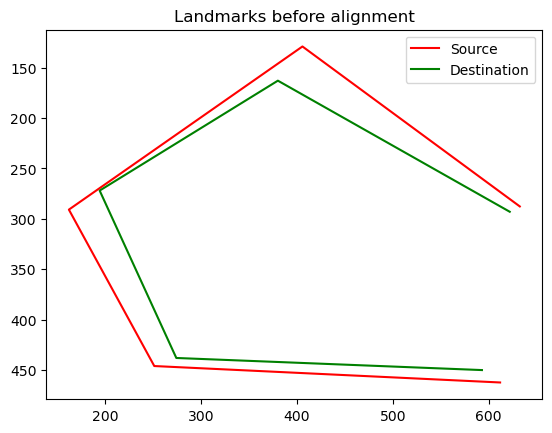

In [26]:
src_transform = matrix_transform(src, tform.params)

Visualize the transformed source landmarks together with the destination landmarks. Also compute the objective function using the transformed points.

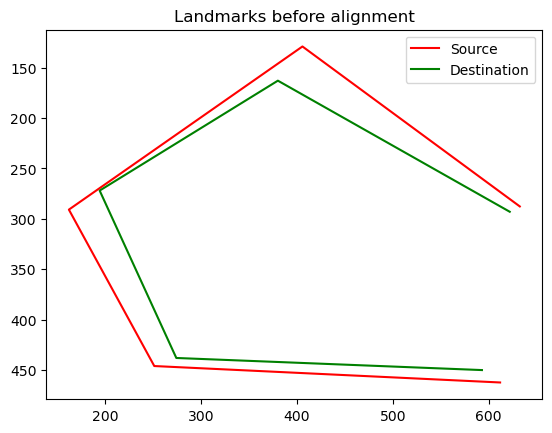

Landmark alignment error F: 4436.277476129557


In [27]:
fig, ax = plt.subplots()
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

We can now apply the transformation to the source image. Notice that we use the inverse transform due to the inverse mapping in the image resampling:

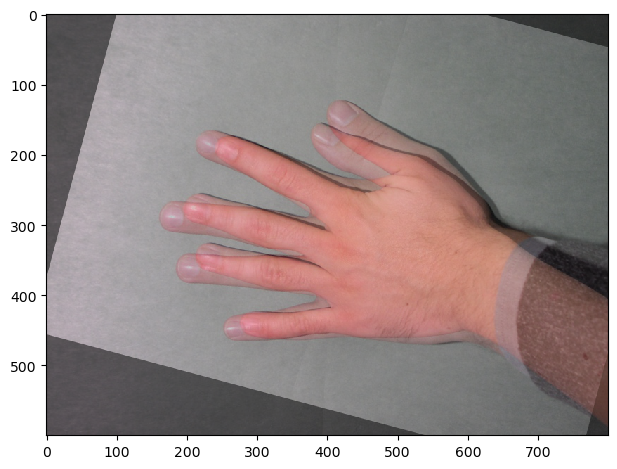

In [30]:
warped = warp(src_img, tform.inverse)
io.imshow(warped)

blend = 0.5 * sk.img_as_float(warped) + 0.5 * sk.img_as_float(dst_img)
io.imshow(blend)
io.show()